In [9]:
# extract model_devi files to a target_dir, eg: model_devi_total/task.000.000006-800k/model_devi.out-iter.000001-task.000.000006-800k
import os
import glob
import shutil
from tqdm import tqdm
from multiprocessing import Pool

import sys
sys.path.append('/home/jxhe/works/cnt/bakup/nano-new/cnt/final')
# from plot_model_devi import get_tag

In [10]:
work_dir = '/home/jxhe/works/cnt/bakup/nano-new/cnt/final'
target_dir = work_dir + "/model_devi_total"
model_devi_path_list = glob.glob(rf"{work_dir}/iter.*/01.model_devi/task.*/model_devi.out", recursive=True)

model_devi_path_list

['/home/jxhe/works/cnt/bakup/nano-new/cnt/final/iter.000000/01.model_devi/task.000.000000/model_devi.out',
 '/home/jxhe/works/cnt/bakup/nano-new/cnt/final/iter.000000/01.model_devi/task.000.000001/model_devi.out',
 '/home/jxhe/works/cnt/bakup/nano-new/cnt/final/iter.000000/01.model_devi/task.000.000002/model_devi.out',
 '/home/jxhe/works/cnt/bakup/nano-new/cnt/final/iter.000000/01.model_devi/task.001.000000/model_devi.out',
 '/home/jxhe/works/cnt/bakup/nano-new/cnt/final/iter.000000/01.model_devi/task.001.000001/model_devi.out',
 '/home/jxhe/works/cnt/bakup/nano-new/cnt/final/iter.000000/01.model_devi/task.001.000002/model_devi.out',
 '/home/jxhe/works/cnt/bakup/nano-new/cnt/final/iter.000000/01.model_devi/task.002.000000/model_devi.out',
 '/home/jxhe/works/cnt/bakup/nano-new/cnt/final/iter.000000/01.model_devi/task.002.000001/model_devi.out',
 '/home/jxhe/works/cnt/bakup/nano-new/cnt/final/iter.000000/01.model_devi/task.002.000002/model_devi.out',
 '/home/jxhe/works/cnt/bakup/nano-new

In [11]:
!rm -rf 04_model_dvi/ 05_model_dvi/
!ls

00.01.DFT PARAM.ipynb	      03_iter.ipynb		 Iteration 1
00_cp2k_cutoff_convg.dat      03_locality_rcut_test.dat  plot.ipynb
00_cp2k_cutoff_plot.svg       03_locality.svg		 plot_mdvi
01_cp2k_rel_cutoff_convg.dat  convergence_plot.svg	 rcut_test.dat
01_cp2k_rel_cutoff_plot.svg   cp2k_cutoff_convg.dat	 scripts
02.DPGEN_RCUT_Testing.ipynb   cp2k_rel_cutoff_convg.dat  small
02_locality_rcut_test.dat     data_all
02_locality.svg		      demo


In [12]:
#按照迭代

import os
import shutil

# 目标目录
dest_directory = '/home/jxhe/works/cnt/bakup/nano-new/cnt/training_info/04_Same_task_temp'

# 如果目标文件夹不存在，则创建
if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)

# 使用字典来按照task.xxx.yyyyyy分类路径
grouped_paths = {}

# 从model_devi_path_list获取路径
for src_path in model_devi_path_list:
    parts = src_path.split('/')
    iter_part = parts[-4]  # 获取iter部分
    task_part = parts[-2]  # 获取task部分
    
    # 将路径按照task.xxx.yyyyyy部分分类
    if task_part not in grouped_paths:
        grouped_paths[task_part] = []
    grouped_paths[task_part].append((iter_part, src_path))

# 对于每个分类，复制文件到相应的文件夹并根据iter重命名
for task, iter_and_paths in grouped_paths.items():
    task_dest_path = os.path.join(dest_directory, task)
    os.makedirs(task_dest_path, exist_ok=True)

    for iter_part, src_file_path in iter_and_paths:
        # 提取 iter.xxx 作为文件名前缀
        dest_file_name = f"{iter_part}_model_devi.out"
        dest_file_path = os.path.join(task_dest_path, dest_file_name)
        shutil.copy2(src_file_path, dest_file_path)

print("复制并重命名完成！")

复制并重命名完成！


In [13]:
# 按照iter和tmp分类
import os
import shutil

# 目标目录
dest_directory = '/home/jxhe/works/cnt/bakup/nano-new/cnt/training_info/05_Same_iter_temp'

# 如果目标文件夹不存在，则创建
if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)

# 使用字典来按照iter.xxx.yyyyyy分类路径
grouped_paths = {}

# 从model_devi_path_list获取路径
for src_path in model_devi_path_list:
    parts = src_path.split('/')
    iter_part = parts[-4]  # 获取iter部分
    task_part = parts[-2]  # 获取task部分

    # 提取yyyyyy部分
    yyyyyy = task_part.split('.')[-1]
    
    # 将路径按照iter.xxx.yyyyyy部分分类
    iter_and_yyyyyy_key = f"{iter_part}.{yyyyyy}"
    if iter_and_yyyyyy_key not in grouped_paths:
        grouped_paths[iter_and_yyyyyy_key] = []
    grouped_paths[iter_and_yyyyyy_key].append((task_part, src_path))

# 对于每个分类，复制文件到相应的文件夹并根据task.xxx重命名
for iter_and_yyyyyy, task_and_paths in grouped_paths.items():
    dest_path = os.path.join(dest_directory, iter_and_yyyyyy)
    os.makedirs(dest_path, exist_ok=True)

    for task_part, src_file_path in task_and_paths:
        # 提取 task.xxx 作为文件名前缀
        dest_file_name = f"{task_part.split('.')[1]}_model_devi.out"
        dest_file_path = os.path.join(dest_path, dest_file_name)
        shutil.copy2(src_file_path, dest_file_path)

print("复制并重命名完成！")


复制并重命名完成！


In [19]:
!mkdir /home/jxhe/works/cnt/bakup/nano-new/cnt/training_info/04_plot_iter

In [18]:
!ls /home/jxhe/works/cnt/bakup/nano-new/cnt/training_info/04_Same_task_temp/task.065.000000/

iter.000027_model_devi.out  iter.000035_model_devi.out
iter.000028_model_devi.out  iter.000036_model_devi.out
iter.000029_model_devi.out  iter.000037_model_devi.out
iter.000030_model_devi.out  iter.000038_model_devi.out
iter.000031_model_devi.out  iter.000039_model_devi.out
iter.000032_model_devi.out  iter.000040_model_devi.out
iter.000033_model_devi.out  iter.000041_model_devi.out
iter.000034_model_devi.out


/tmp/ipykernel_24529/694121403.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm_r', len(selected_files))


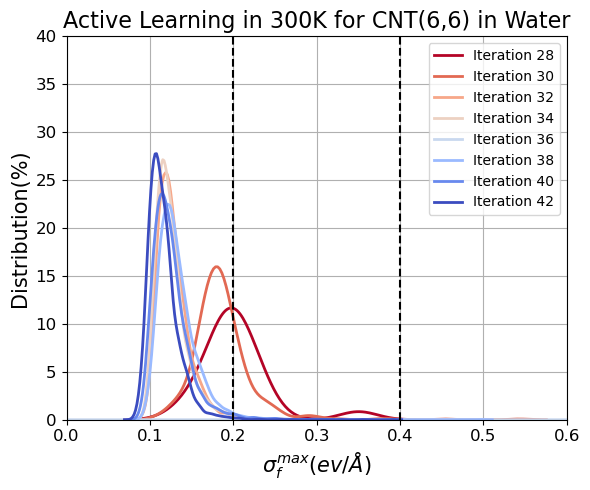

/tmp/ipykernel_24529/694121403.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm_r', len(selected_files))


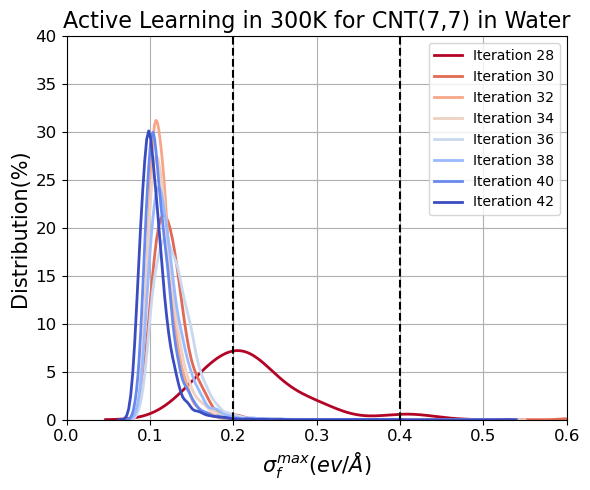

/tmp/ipykernel_24529/694121403.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm_r', len(selected_files))


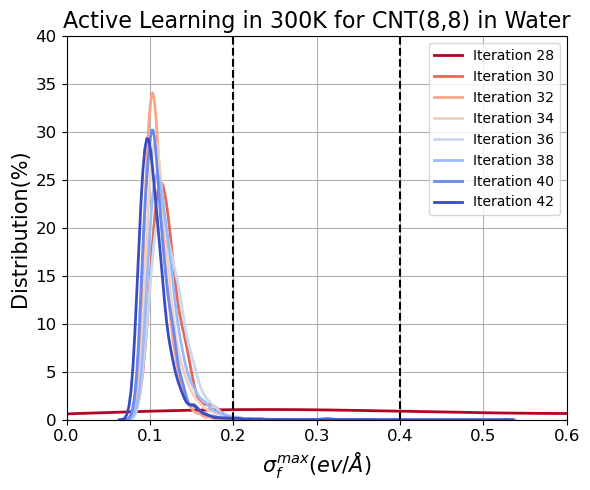

/tmp/ipykernel_24529/694121403.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm_r', len(selected_files))


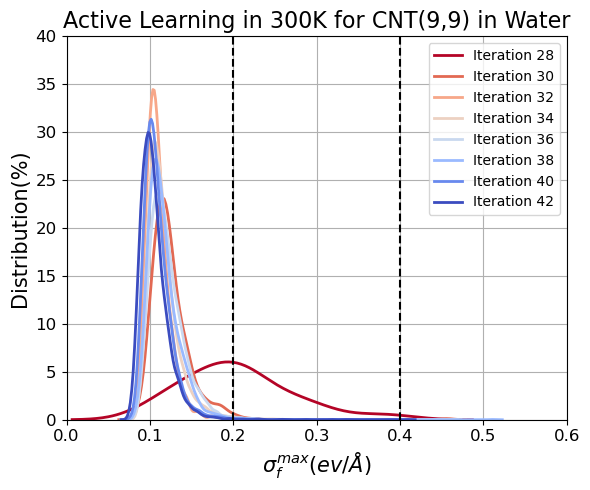

/tmp/ipykernel_24529/694121403.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm_r', len(selected_files))


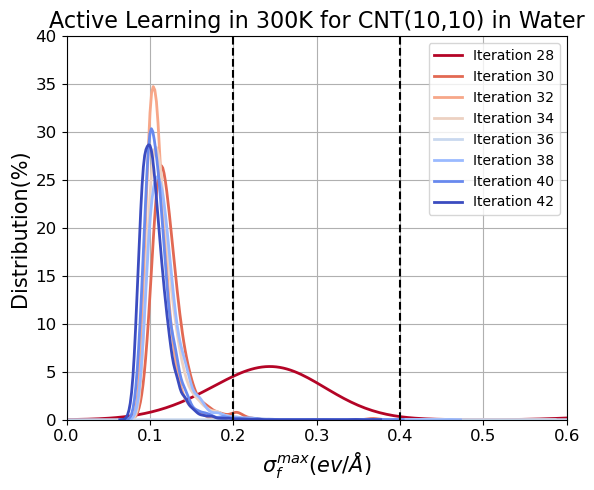

/tmp/ipykernel_24529/694121403.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm_r', len(selected_files))


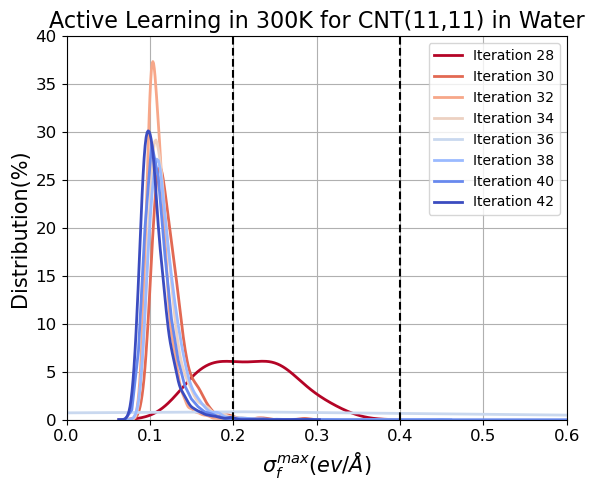

/tmp/ipykernel_24529/694121403.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm_r', len(selected_files))


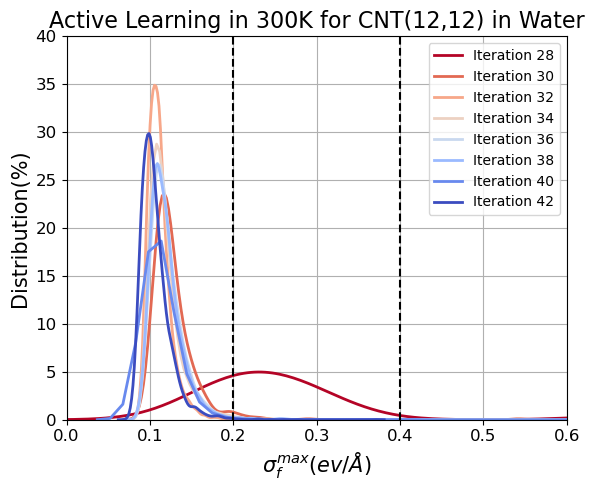

In [25]:
# 画子图 
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import pandas as pd

def plot_model_devi(file_dir: str, trust_lo: float, trust_hi: float, color: str) -> np.ndarray:
    data = np.loadtxt(file_dir, usecols=4)
    accurate_ratio = np.sum(data < trust_lo) / data.shape[0] * 100
    failed_ratio = np.sum(data > trust_hi) / data.shape[0] * 100
    candidate_ratio = 100 - accurate_ratio - failed_ratio
    max_data = np.max(data)
    
    log_message = (
        f"For file: {file_dir}\n"
        f"accurate          : {accurate_ratio:6.2f}%\n"
        f"candidate         : {candidate_ratio:6.2f}%\n"
        f"failed            : {failed_ratio:6.2f}%\n"
        f"Max Model Devi.   : {max_data:6.2f} eV/A\n\n"
    )

    with open(os.path.join(os.path.dirname(file_dir), 'log.txt'), 'a') as log_file:
        log_file.write(log_message)

    iteration_num = int(file_dir.split('/')[-1].split('_')[0].split('.')[-1]) + 1
    sns.kdeplot(data, color=color, lw=2, label=f"Iteration {iteration_num}")
    
    return data

def plot_all_in_dir(task_number: int, base_directory: str, trust_lo: float, trust_hi: float) -> None:
    directory = os.path.join(base_directory, f"task.{task_number:03}.000000")
    all_files = sorted([f for f in os.listdir(directory) if f.endswith('.out')])
    selected_files = all_files[::2]

    fig, ax = plt.subplots(figsize=(6, 5))

    color_map = cm.get_cmap('coolwarm_r', len(selected_files))
    all_data = []
    for i, file in enumerate(selected_files):
        file_path = os.path.join(directory, file)
        file_data = plot_model_devi(file_path, trust_lo, trust_hi, color_map(i))
        all_data.append(file_data)

    # To handle potential length mismatch in data arrays, use padding with NaN
    max_len = max(len(data) for data in all_data)
    padded_data = [np.pad(data, (0, max_len - len(data)), mode='constant', constant_values=np.nan) for data in all_data]

    title = f"Active Learning in 300K for CNT({6 + (task_number-65)//3},{6 + (task_number-65)//3}) in Water"
    ax.axvline(x=trust_lo, ymin=0, ymax=1, color='k', ls='--')
    ax.axvline(x=trust_hi, ymin=0, ymax=1, color='k', ls='--')
    ax.set_xlim(0, 0.6)
    ax.set_ylim(0, 40)
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r"$\sigma_{f}^{max} (ev/Å)$", fontsize=15)
    ax.set_ylabel("Distribution(%)", fontsize=15)
    ax.set_title(title, fontsize=16)
    ax.grid(True)
    ax.legend()

    plt.tight_layout()
    
    save_directory = "/home/jxhe/works/cnt/bakup/nano-new/cnt/training_info/04_plot_iter"
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)
    
    plt.savefig(os.path.join(save_directory, f'{title.replace(" ", "_")}.svg'), format='svg', transparent=True)

    # Convert the padded_data to DataFrame and save to CSV
    df = pd.DataFrame(np.array(padded_data).T)
    df.to_csv(os.path.join(save_directory, f'{title.replace(" ", "_")}.csv'), index=False)

    plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# def plot_from_csv(csv_file: str) -> None:
#     # 从CSV文件读取数据
#     df = pd.read_csv(csv_file)
    
#     # 创建一个绘图窗口
#     plt.figure(figsize=(6, 5))
    
#     # 对于DataFrame中的每一列（即每次迭代），绘制核密度估计图
#     for col in df.columns:
#         sns.kdeplot(df[col].dropna(), lw=2, label=col)

#     # 设置图的标题、标签等
#     title = csv_file.split('/')[-1].replace("_", " ").replace(".csv", "")
#     plt.title(title, fontsize=16)
#     plt.xlabel(r"$\sigma_{f}^{max} (ev/Å)$", fontsize=15)
#     plt.ylabel("Distribution(%)", fontsize=15)
#     plt.legend()
#     plt.tight_layout()

#     # 显示图
#     plt.show()

# # 使用该函数
# csv_directory = "/path/to/csv/directory"  # 修改为你的CSV文件目录
# csv_file = os.path.join(csv_directory, 'desired_file.csv')  # 选择要读取的CSV文件
# plot_from_csv(csv_file)


base_directory = "/home/jxhe/works/cnt/bakup/nano-new/cnt/training_info/04_Same_task_temp"
for task_num in range(65, 84,3):
    plot_all_in_dir(task_num, base_directory, trust_lo=0.20, trust_hi=0.4)



/tmp/ipykernel_24529/3657389564.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm_r', len(yy_values))


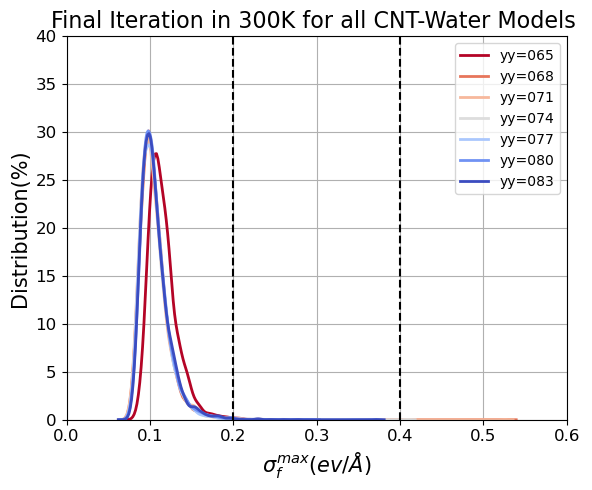

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

def plot_model_devi(file_dir: str, trust_lo: float, trust_hi: float, color: str) -> np.ndarray:
    data = np.loadtxt(file_dir, usecols=4)
    yy = file_dir.split('/')[-1].split('_')[0]
    sns.kdeplot(data, color=color, lw=2, label=f"yy={yy}")

    return data

def plot_and_save(iter_directory: str, trust_lo: float, trust_hi: float) -> None:
    all_data = []

    fig, ax = plt.subplots(figsize=(6, 5))

    yy_values = list(range(65, 84, 3))
    color_map = cm.get_cmap('coolwarm_r', len(yy_values))

    for i, yy in enumerate(yy_values):
        file_name = f"0{yy}_model_devi.out"
        file_path = os.path.join(iter_directory, file_name)
        file_data = plot_model_devi(file_path, trust_lo, trust_hi, color_map(i))
        all_data.append(file_data)

    title = f"Final Iteration in 300K for all CNT-Water Models "
    ax.axvline(x=trust_lo, ymin=0, ymax=1, color='k', ls='--')
    ax.axvline(x=trust_hi, ymin=0, ymax=1, color='k', ls='--')
    ax.set_xlim(0, 0.6)
    ax.set_ylim(0, 40)
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r"$\sigma_{f}^{max} (ev/Å)$", fontsize=15)
    ax.set_ylabel("Distribution(%)", fontsize=15)
    ax.set_title(title, fontsize=16)
    ax.grid(True)
    ax.legend()

    plt.tight_layout()

    save_directory = "/home/jxhe/works/cnt/bakup/nano-new/cnt/training_info/05_plot_iter"
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)
    
    plt.savefig(os.path.join(save_directory, f'{title.replace(" ", "_")}.svg'), format='svg', transparent=True)

    # Handle CSV saving
    max_len = max(len(data) for data in all_data)
    padded_data = [np.pad(data, (0, max_len - len(data)), mode='constant', constant_values=np.nan) for data in all_data]
    df = pd.DataFrame(np.array(padded_data).T, columns=[f"yy_{yy}" for yy in yy_values])
    df.to_csv(os.path.join(save_directory, f'{title.replace(" ", "_")}.csv'), index=False)

    plt.show()

# Execute the function
iter_directory = "/home/jxhe/works/cnt/bakup/nano-new/cnt/training_info/05_Same_iter_temp/iter.000041.000000"
plot_and_save(iter_directory, trust_lo=0.20, trust_hi=0.4)


/tmp/ipykernel_24529/3142081931.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm_r', len(yy_values))


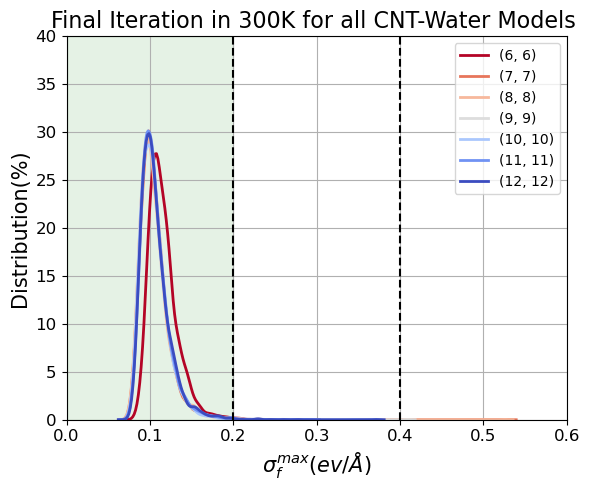

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

def plot_model_devi(file_dir: str, trust_lo: float, trust_hi: float, color: str) -> np.ndarray:
    data = np.loadtxt(file_dir, usecols=4)
    yy = int(file_dir.split('/')[-1].split('_')[0][1:3])
    label_value = (6 + (yy-65)//3)
    sns.kdeplot(data, color=color, lw=2, label=f"({label_value}, {label_value})")

    return data

def plot_and_save(iter_directory: str, trust_lo: float, trust_hi: float) -> None:
    all_data = []

    fig, ax = plt.subplots(figsize=(6, 5))

    yy_values = list(range(65, 84, 3))
    color_map = cm.get_cmap('coolwarm_r', len(yy_values))

    for i, yy in enumerate(yy_values):
        file_name = f"0{yy}_model_devi.out"
        file_path = os.path.join(iter_directory, file_name)
        file_data = plot_model_devi(file_path, trust_lo, trust_hi, color_map(i))
        all_data.append(file_data)

    title = f"Final Iteration in 300K for all CNT-Water Models "
    ax.axvline(x=trust_lo, ymin=0, ymax=1, color='k', ls='--')
    ax.axvline(x=trust_hi, ymin=0, ymax=1, color='k', ls='--')
    ax.fill_between([0, trust_lo], 0, 40, color='green', alpha=0.1)  # Filling the area between 0 and trust_lo with green color
    ax.set_xlim(0, 0.6)
    ax.set_ylim(0, 40)
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r"$\sigma_{f}^{max} (ev/Å)$", fontsize=15)
    ax.set_ylabel("Distribution(%)", fontsize=15)
    ax.set_title(title, fontsize=16)
    ax.grid(True)
    ax.legend()

    plt.tight_layout()

    save_directory = "/home/jxhe/works/cnt/bakup/nano-new/cnt/training_info/05_plot_iter"
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)
    
    plt.savefig(os.path.join(save_directory, f'{title.replace(" ", "_")}.svg'), format='svg', transparent=True)

    # Handle CSV saving
    max_len = max(len(data) for data in all_data)
    padded_data = [np.pad(data, (0, max_len - len(data)), mode='constant', constant_values=np.nan) for data in all_data]
    df = pd.DataFrame(np.array(padded_data).T, columns=[f"yy_{yy}" for yy in yy_values])
    df.to_csv(os.path.join(save_directory, f'{title.replace(" ", "_")}.csv'), index=False)

    plt.show()

# Execute the function
iter_directory = "/home/jxhe/works/cnt/bakup/nano-new/cnt/training_info/05_Same_iter_temp/iter.000041.000000"
plot_and_save(iter_directory, trust_lo=0.20, trust_hi=0.4)

In [61]:
!mkdir /home/jxhe/works/cnt/bakup/nano-new/cnt/training_info/plot_mdvi